In [46]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, InputLayer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np

# New section

In [47]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoder.fit(train.Y.values.reshape(-1,1))

train_y = onehot_encoder.transform(train.Y.values.reshape(-1,1))
test_y = onehot_encoder.transform(test.Y.values.reshape(-1,1))
train_X = train.drop("Y", axis=1)
test_X = test.drop("Y", axis=1)

In [49]:
class NNFactory:
  def __init__(self):
    self.model_list = []
  
  def add_model(self,lst):
    model = Sequential()
    model.add(InputLayer(393))
    for i in lst:
      model.add(Dense(i, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    self.model_list.append(model)

  def summary(self):
    for model in self.model_list:
      print(model.summary())

  def train(self):
    self.history_list = []
    for model in self.model_list:
      history = model.fit(
          train_X, train_y, 
          validation_data=(test_X, test_y), 
          epochs=10,
          batch_size=128)
      self.history_list.append(history)

  def evaluate(self):
    self.train_acc_list = []
    self.test_acc_list = []
    for model in self.model_list:
      _, train_acc = model.evaluate(train_X, train_y, verbose=0)
      _, test_acc = model.evaluate(test_X, test_y, verbose=0)
      self.train_acc_list.append(train_acc)
      self.test_acc_list.append(test_acc)

    print(f"Average Training Accuracy: {np.array(self.train_acc_list).mean(0).round(3)}")
    print(f"Average Test Accuracy: {np.array(self.test_acc_list).mean(0).round(3)}")

In [50]:
nn = NNFactory()
a= nn.add_model([200])
b = nn.add_model([400])
c = nn.add_model([400, 300])
d = nn.add_model([400, 300, 200])
e =nn.add_model([400, 300, 200, 100])

In [51]:
nn.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_86 (Dense)            (None, 200)               78800     
                                                                 
 dense_87 (Dense)            (None, 10)                2010      
                                                                 
Total params: 80,810
Trainable params: 80,810
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_88 (Dense)            (None, 400)               157600    
                                                                 
 dense_89 (Dense)            (None, 10)                4010      
                                                                 
Total params: 161,610

In [52]:
nn.train()

Epoch 1/10
235/235 [==============================] - 2s 6ms/step - loss: 1.2682 - accuracy: 0.5899 - val_loss: 1.3549 - val_accuracy: 0.5743
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.7915 - accuracy: 0.7694 - val_loss: 1.1755 - val_accuracy: 0.6568
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6189 - accuracy: 0.8205 - val_loss: 1.1230 - val_accuracy: 0.6773
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.5306 - accuracy: 0.8439 - val_loss: 1.0585 - val_accuracy: 0.6961
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.4697 - accuracy: 0.8615 - val_loss: 1.0488 - val_accuracy: 0.7039
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 0.4259 - accuracy: 0.8739 - val_loss: 1.0643 - val_accuracy: 0.7103
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 0.3904 - accuracy: 0.8845 - val_loss: 0.9984 - val_accuracy: 0.7238
Epoch 

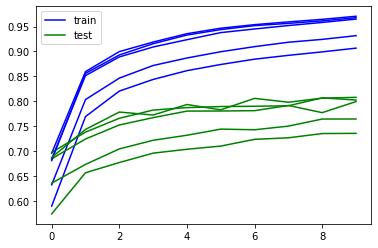

In [53]:
for i, history in enumerate(nn.history_list):
  if i == 0:
    plt.plot(history.history['accuracy'], color="blue", label="train")
    plt.plot(history.history['val_accuracy'], color="green", label="test")
  else:
    plt.plot(history.history['accuracy'], color="blue")
    plt.plot(history.history['val_accuracy'], color="green")
plt.legend()
plt.show()

In [54]:
nn.evaluate()


Average Training Accuracy: 0.954
Average Test Accuracy: 0.782


In [65]:
(nn.model_list[1]).predict(test_X)  #### to get each model

array([[1.45028600e-09, 1.20411823e-11, 1.31228823e-08, ...,
        1.30344374e-10, 4.95098493e-06, 5.17757712e-07],
       [1.33126704e-07, 2.63211092e-07, 8.03248986e-05, ...,
        9.99593794e-01, 5.50472464e-07, 1.93335683e-04],
       [5.60729120e-07, 1.10590204e-09, 6.68793865e-09, ...,
        9.12937637e-09, 3.68701760e-03, 1.95170287e-05],
       ...,
       [3.65892083e-05, 5.89481068e-12, 4.39135391e-07, ...,
        5.31683164e-03, 7.11073014e-08, 9.93634701e-01],
       [9.78341532e-08, 1.04795696e-07, 1.39971823e-03, ...,
        7.72579515e-04, 1.93726737e-02, 9.47011828e-01],
       [2.48640049e-06, 4.09344739e-06, 1.56629233e-06, ...,
        2.07486097e-02, 8.33396858e-04, 2.54667527e-03]], dtype=float32)